In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel("C:/Users/dell/Downloads/archive (1)/PCOS_data_without_infertility.xlsx", sheet_name=1)

In [3]:
df

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.000,19.300000,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.500,24.921163,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.000,25.270891,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.000,29.674945,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.000,20.060954,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,537,537,0,35,50.0,164.592,18.500000,17,72,16,...,0.0,0,110,70,1,0,17.5,10.0,6.7,NaN
537,538,538,0,30,63.2,158.000,25.300000,15,72,18,...,0.0,0,110,70,9,7,19.0,18.0,8.2,NaN
538,539,539,0,36,54.0,152.000,23.400000,13,74,20,...,0.0,0,110,80,1,0,18.0,9.0,7.3,NaN
539,540,540,0,27,50.0,150.000,22.200000,15,74,20,...,0.0,0,110,70,7,6,18.0,16.0,11.5,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [5]:
df.describe()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,...,541.000000,540.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,271.000000,271.000000,0.327172,31.430684,59.637153,156.484835,24.311285,13.802218,73.247689,19.243993,...,0.489834,0.514815,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915
std,156.317519,156.317519,0.469615,5.411006,11.028287,6.033545,4.056399,1.840812,4.430285,1.688629,...,0.500359,0.500244,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381
min,1.000000,1.000000,0.000000,20.000000,31.000000,137.000000,12.417882,11.000000,13.000000,16.000000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,136.000000,136.000000,0.000000,28.000000,52.000000,152.000000,21.641274,13.000000,72.000000,18.000000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,271.000000,271.000000,0.000000,31.000000,59.000000,156.000000,24.238227,14.000000,72.000000,18.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,406.000000,406.000000,1.000000,35.000000,65.000000,160.000000,26.634958,15.000000,74.000000,20.000000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,541.000000,541.000000,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


In [6]:
df.shape

(541, 45)

In [7]:
df.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


In [8]:
df.tail()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
536,537,537,0,35,50.0,164.592,18.5,17,72,16,...,0.0,0,110,70,1,0,17.5,10.0,6.7,NaN
537,538,538,0,30,63.2,158.000,25.3,15,72,18,...,0.0,0,110,70,9,7,19.0,18.0,8.2,NaN
538,539,539,0,36,54.0,152.000,23.4,13,74,20,...,0.0,0,110,80,1,0,18.0,9.0,7.3,NaN
539,540,540,0,27,50.0,150.000,22.2,15,74,20,...,0.0,0,110,70,7,6,18.0,16.0,11.5,NaN
540,541,541,1,23,82.0,165.000,30.1,13,80,20,...,1.0,0,120,70,9,10,19.0,18.0,6.9,NaN


In [9]:
df.columns

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       'Unnamed: 44'],
      dtype='object')

In [10]:
df.rename(columns = {'Sl. No':'SlNo', 'Patient File No.':'Patient File No','No. of aborptions':'No of aborptions', '  I   beta-HCG(mIU/mL)':'I   betaHCG(mIU/mL)', 'II    beta-HCG(mIU/mL)':'II    betaHCG(mIU/mL)', 'Waist:Hip Ratio':'WaistHip Ratio', 'Reg.Exercise(Y/N)':'RegExercise(Y/N)', 'Follicle No. (L)':'Follicle No(L)', 'Follicle No. (R)':'Follicle No(R)', 'Avg. F size (L) (mm)':'Avg F size (L) (mm)', 'Avg. F size (R) (mm)':'Avg F size (R) (mm)'}, inplace = True)

In [11]:
df.nunique()

SlNo                     541
Patient File No          541
PCOS (Y/N)                 2
 Age (yrs)                29
Weight (Kg)              117
Height(Cm)                50
BMI                      355
Blood Group                8
Pulse rate(bpm)           11
RR (breaths/min)           8
Hb(g/dl)                  46
Cycle(R/I)                 3
Cycle length(days)        12
Marraige Status (Yrs)     34
Pregnant(Y/N)              2
No of aborptions           6
I   betaHCG(mIU/mL)      307
II    betaHCG(mIU/mL)    203
FSH(mIU/mL)              371
LH(mIU/mL)               342
FSH/LH                   512
Hip(inch)                 19
Waist(inch)               23
WaistHip Ratio            96
TSH (mIU/L)              308
AMH(ng/mL)               301
PRL(ng/mL)               481
Vit D3 (ng/mL)           331
PRG(ng/mL)                89
RBS(mg/dl)                55
Weight gain(Y/N)           2
hair growth(Y/N)           2
Skin darkening (Y/N)       2
Hair loss(Y/N)             2
Pimples(Y/N)  

In [12]:
df.nunique().count()

45

In [13]:
df.isnull().values.sum()

541

In [14]:
df.isnull().sum()

SlNo                       0
Patient File No            0
PCOS (Y/N)                 0
 Age (yrs)                 0
Weight (Kg)                0
Height(Cm)                 0
BMI                        0
Blood Group                0
Pulse rate(bpm)            0
RR (breaths/min)           0
Hb(g/dl)                   0
Cycle(R/I)                 0
Cycle length(days)         0
Marraige Status (Yrs)      1
Pregnant(Y/N)              0
No of aborptions           0
I   betaHCG(mIU/mL)        0
II    betaHCG(mIU/mL)      0
FSH(mIU/mL)                0
LH(mIU/mL)                 0
FSH/LH                     0
Hip(inch)                  0
Waist(inch)                0
WaistHip Ratio             0
TSH (mIU/L)                0
AMH(ng/mL)                 0
PRL(ng/mL)                 0
Vit D3 (ng/mL)             0
PRG(ng/mL)                 0
RBS(mg/dl)                 0
Weight gain(Y/N)           0
hair growth(Y/N)           0
Skin darkening (Y/N)       0
Hair loss(Y/N)             0
Pimples(Y/N)  

In [15]:
(df.isnull().sum()/(len(df)))*100              #percentage of missing values in each row

SlNo                      0.000000
Patient File No           0.000000
PCOS (Y/N)                0.000000
 Age (yrs)                0.000000
Weight (Kg)               0.000000
Height(Cm)                0.000000
BMI                       0.000000
Blood Group               0.000000
Pulse rate(bpm)           0.000000
RR (breaths/min)          0.000000
Hb(g/dl)                  0.000000
Cycle(R/I)                0.000000
Cycle length(days)        0.000000
Marraige Status (Yrs)     0.184843
Pregnant(Y/N)             0.000000
No of aborptions          0.000000
I   betaHCG(mIU/mL)       0.000000
II    betaHCG(mIU/mL)     0.000000
FSH(mIU/mL)               0.000000
LH(mIU/mL)                0.000000
FSH/LH                    0.000000
Hip(inch)                 0.000000
Waist(inch)               0.000000
WaistHip Ratio            0.000000
TSH (mIU/L)               0.000000
AMH(ng/mL)                0.000000
PRL(ng/mL)                0.000000
Vit D3 (ng/mL)            0.000000
PRG(ng/mL)          

<Axes: >

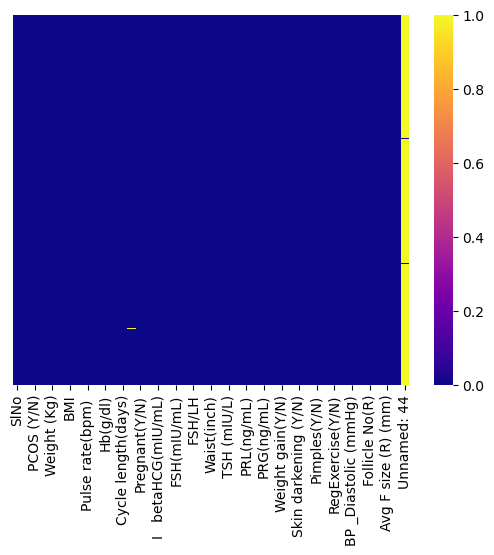

In [16]:
sns.heatmap(df.isnull(), yticklabels=False, cmap="plasma")          #Visualizing null values

In [17]:
df.drop(['Unnamed: 44'], axis=1, inplace=True)                  #dropping unwanted column

<Axes: >

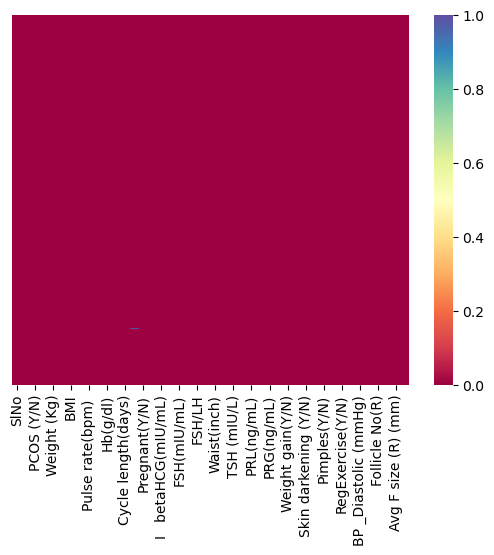

In [18]:
sns.heatmap(df.isnull(), yticklabels=False, cmap="Spectral")

In [19]:
df['Fast food (Y/N)'].fillna(method='ffill' , inplace=True)

In [20]:
df['Marraige Status (Yrs)'].fillna(df['Marraige Status (Yrs)'].mean(), inplace=True)

<Axes: >

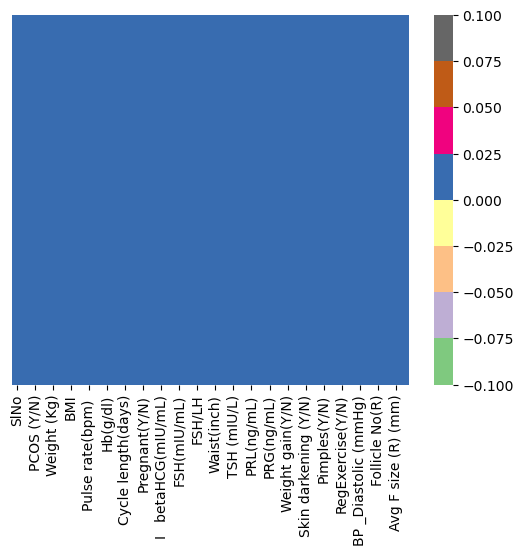

In [21]:
sns.heatmap(df.isnull(), yticklabels=False, cmap="Accent")

In [22]:
df.isnull().sum()

SlNo                     0
Patient File No          0
PCOS (Y/N)               0
 Age (yrs)               0
Weight (Kg)              0
Height(Cm)               0
BMI                      0
Blood Group              0
Pulse rate(bpm)          0
RR (breaths/min)         0
Hb(g/dl)                 0
Cycle(R/I)               0
Cycle length(days)       0
Marraige Status (Yrs)    0
Pregnant(Y/N)            0
No of aborptions         0
I   betaHCG(mIU/mL)      0
II    betaHCG(mIU/mL)    0
FSH(mIU/mL)              0
LH(mIU/mL)               0
FSH/LH                   0
Hip(inch)                0
Waist(inch)              0
WaistHip Ratio           0
TSH (mIU/L)              0
AMH(ng/mL)               0
PRL(ng/mL)               0
Vit D3 (ng/mL)           0
PRG(ng/mL)               0
RBS(mg/dl)               0
Weight gain(Y/N)         0
hair growth(Y/N)         0
Skin darkening (Y/N)     0
Hair loss(Y/N)           0
Pimples(Y/N)             0
Fast food (Y/N)          0
RegExercise(Y/N)         0
B

Text(0.5, 1.0, 'Starting 10 patient with their Age')

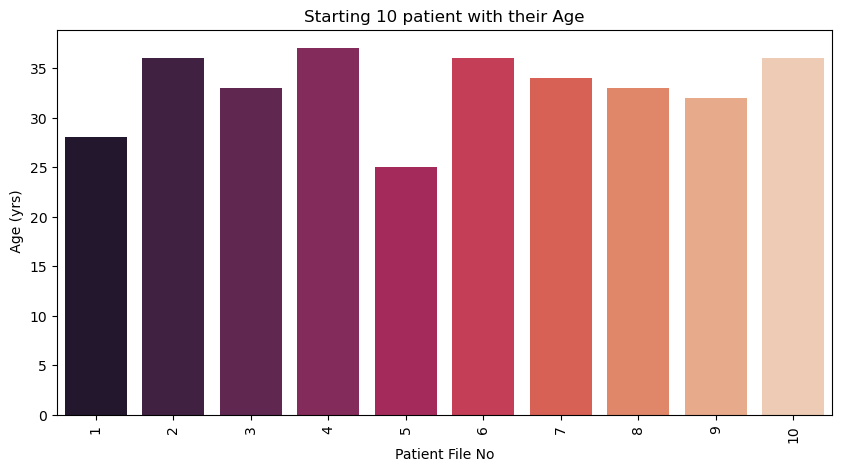

In [23]:
plt.figure(figsize=(10,5))
sns.barplot(y=" Age (yrs)", x='Patient File No', data=df, order=df['Patient File No'].iloc[:10], palette='rocket')
plt.xticks(rotation=90)
plt.title('Starting 10 patient with their Age')

In [24]:
a = df.groupby('Blood Group')['Blood Group'].count()

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '11'),
  Text(1, 0, '12'),
  Text(2, 0, '13'),
  Text(3, 0, '14'),
  Text(4, 0, '15'),
  Text(5, 0, '16'),
  Text(6, 0, '17'),
  Text(7, 0, '18')])

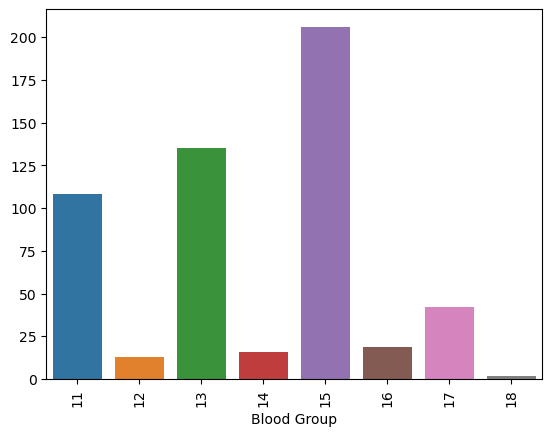

In [25]:
sns.barplot(x=a.index, y=a.values)
plt.xticks(rotation=90)

In [26]:
a = df.groupby('Cycle(R/I)')['Cycle(R/I)'].count()

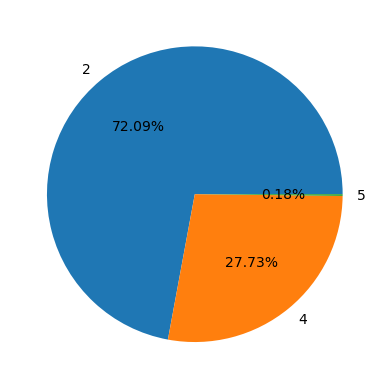

In [27]:
plt.pie(a, labels=a.index, autopct='%.2f%%')
plt.show()

In [28]:
a = df.groupby('No of aborptions')['No of aborptions'].count()

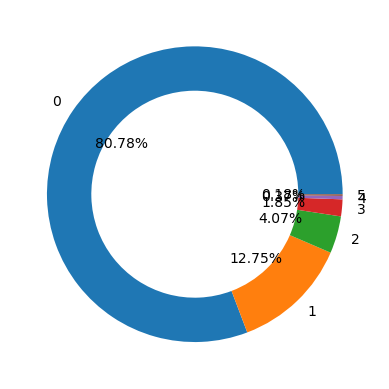

In [29]:
plt.pie(a, labels=a.index, autopct='%.2f%%', wedgeprops=dict(width=0.3))
plt.show()

<Axes: xlabel='Endometrium (mm)', ylabel='Count'>

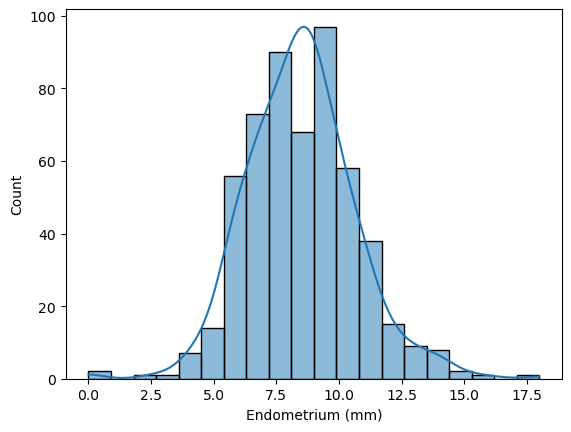

In [30]:
sns.histplot(df['Endometrium (mm)'], bins=20, kde=True)

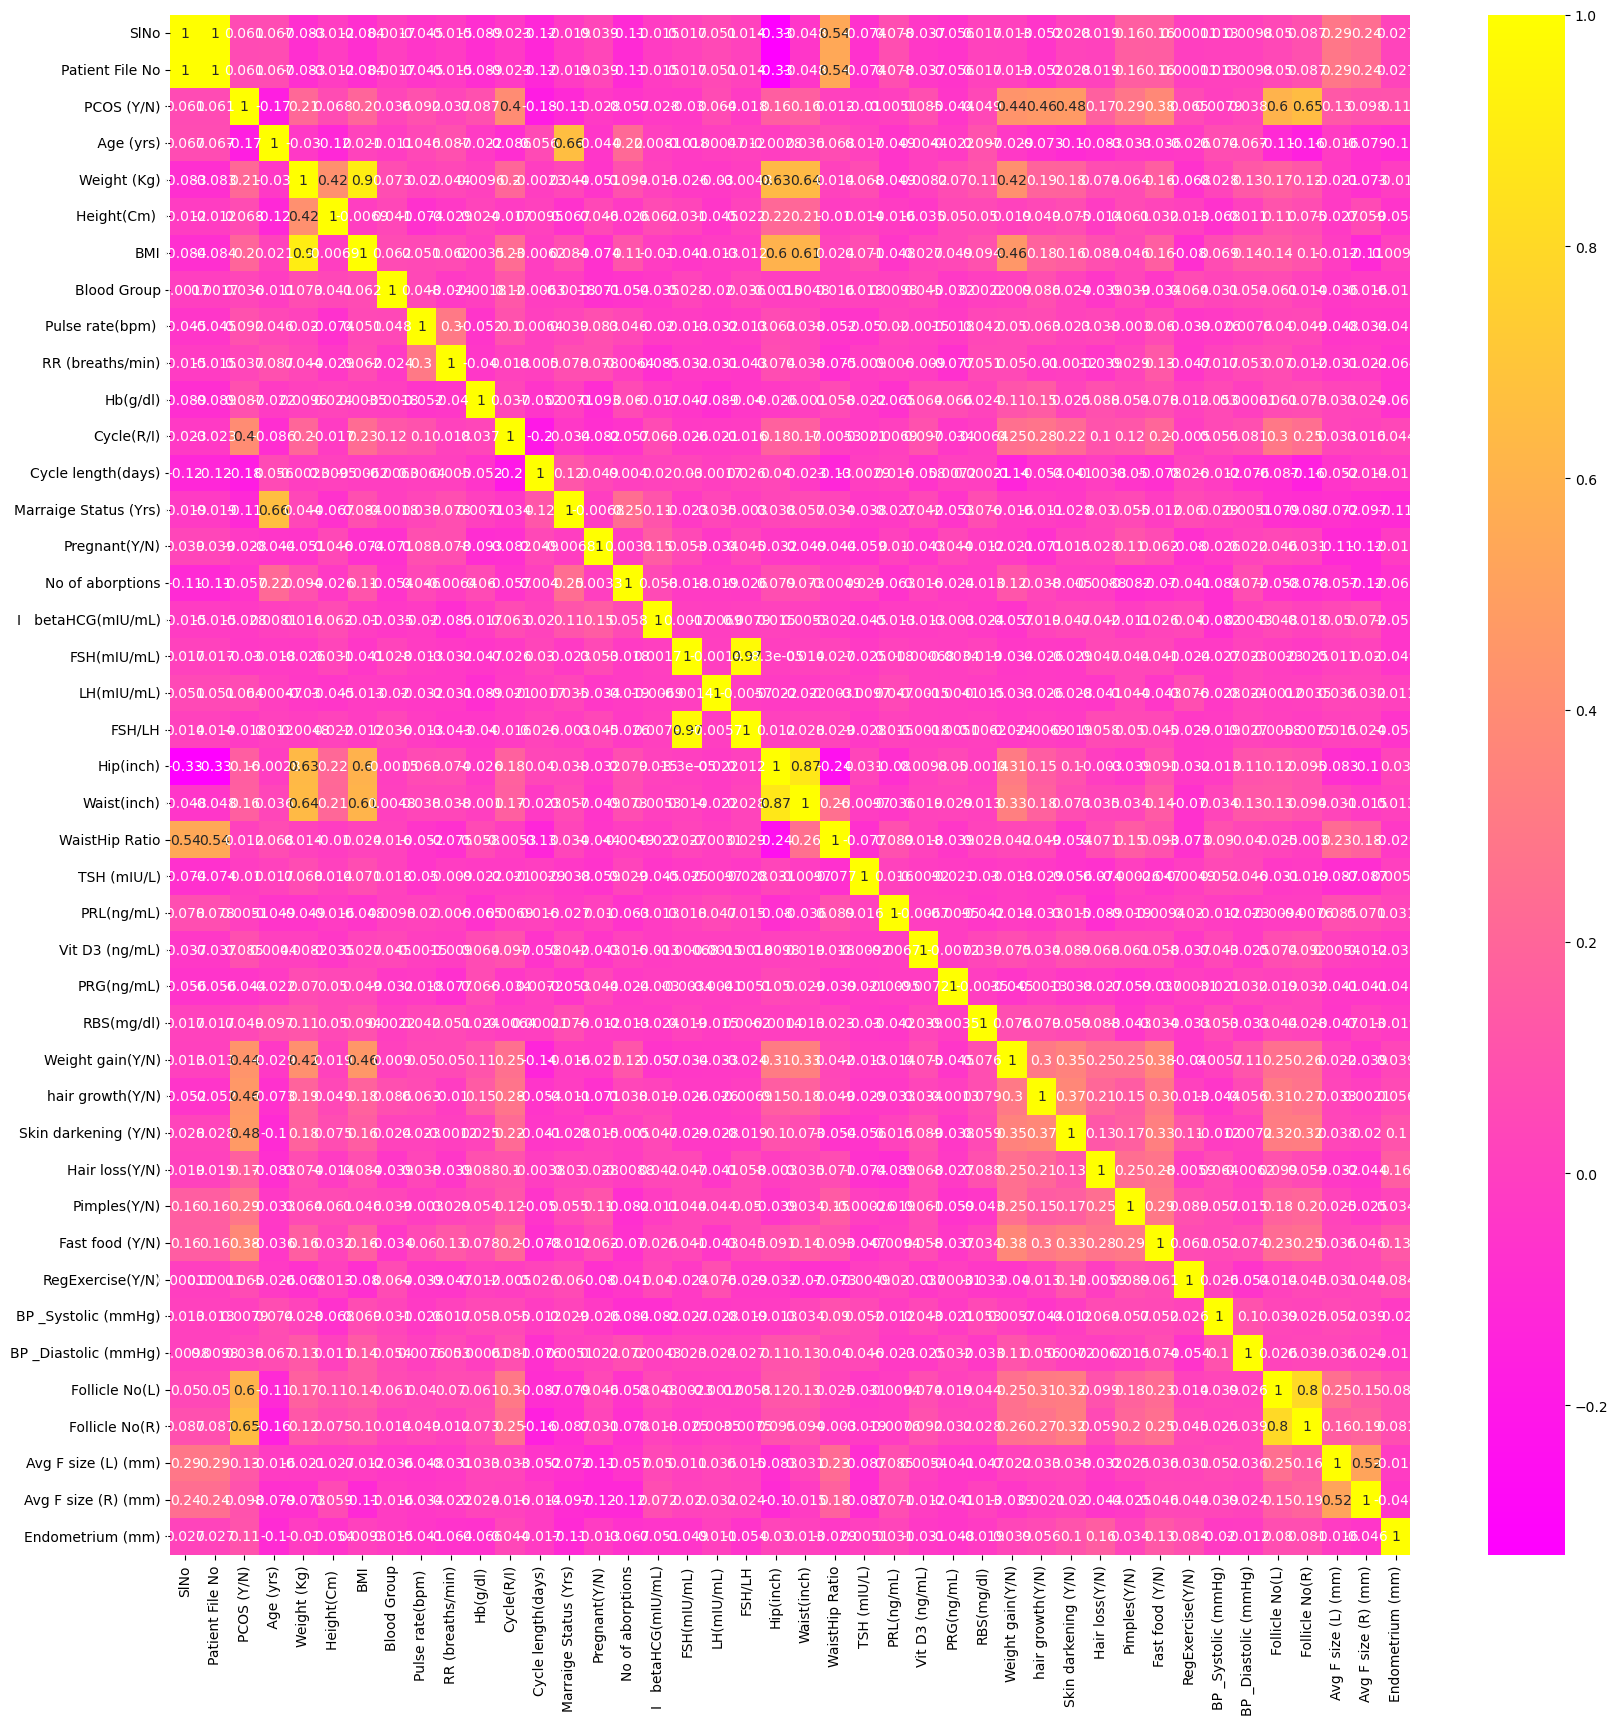

In [31]:
#Plotting correlation heatmap
plt.figure(figsize=(20, 20))
dataplot = sns.heatmap(df.corr(), cmap="spring", annot=True)
plt.show()                             # displaying heatmap

<Axes: xlabel='PCOS (Y/N)', ylabel=' Age (yrs)'>

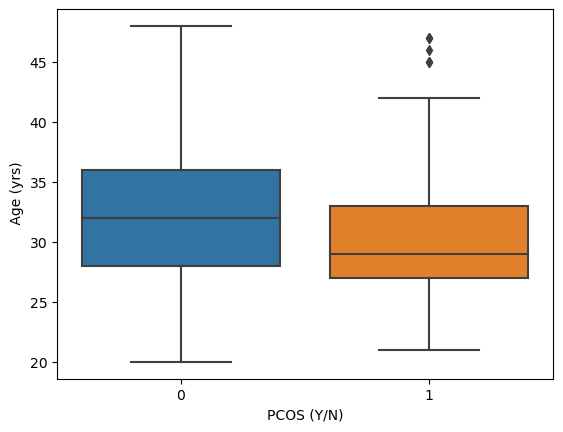

In [32]:
sns.boxplot(y=" Age (yrs)", x="PCOS (Y/N)", data=df)

<Axes: xlabel='PCOS (Y/N)', ylabel='Weight (Kg)'>

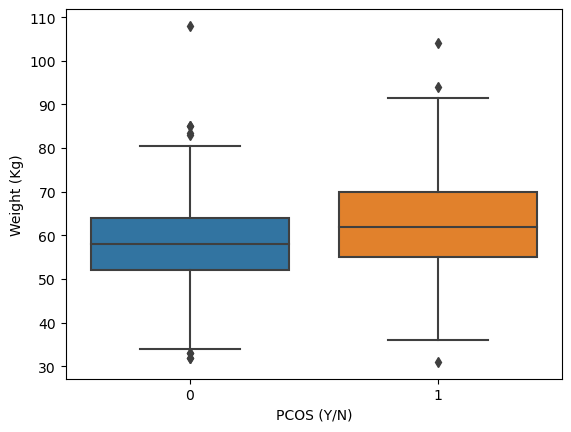

In [33]:
sns.boxplot(y="Weight (Kg)", x="PCOS (Y/N)", data=df)

<Axes: xlabel='Pimples(Y/N)', ylabel='Fast food (Y/N)'>

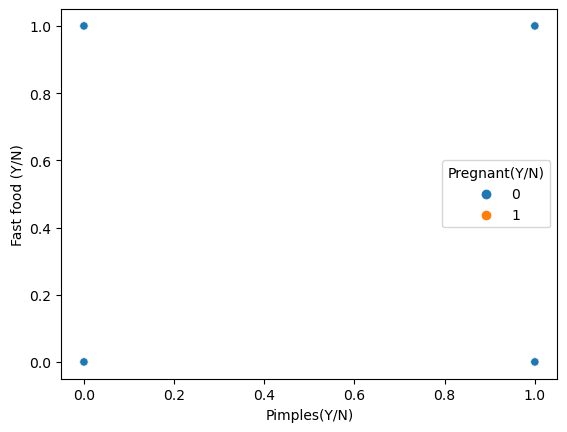

In [34]:
sns.scatterplot(x='Pimples(Y/N)', y='Fast food (Y/N)', hue='Pregnant(Y/N)', data=df)

<Axes: xlabel='Pregnant(Y/N)', ylabel='count'>

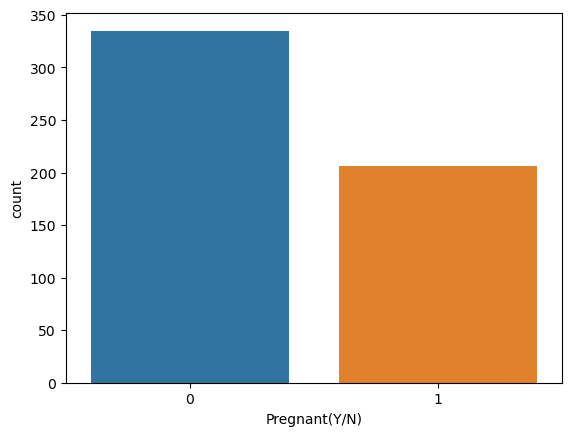

In [35]:
sns.countplot(x='Pregnant(Y/N)', data=df)

<Axes: xlabel='Pregnant(Y/N)', ylabel='count'>

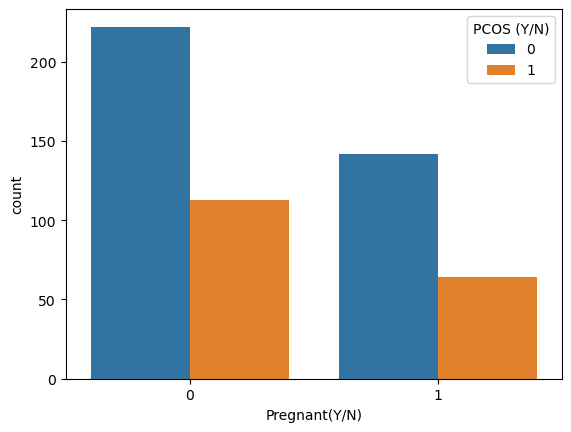

In [36]:
sns.countplot(x='Pregnant(Y/N)', hue='PCOS (Y/N)', data=df)

<Axes: xlabel='PCOS (Y/N)', ylabel='No of aborptions'>

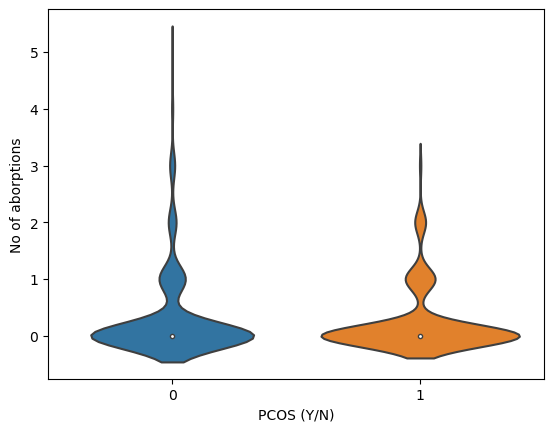

In [37]:
sns.violinplot(x='PCOS (Y/N)', y='No of aborptions', data=df)

<Axes: xlabel='Weight gain(Y/N)', ylabel='RBS(mg/dl)'>

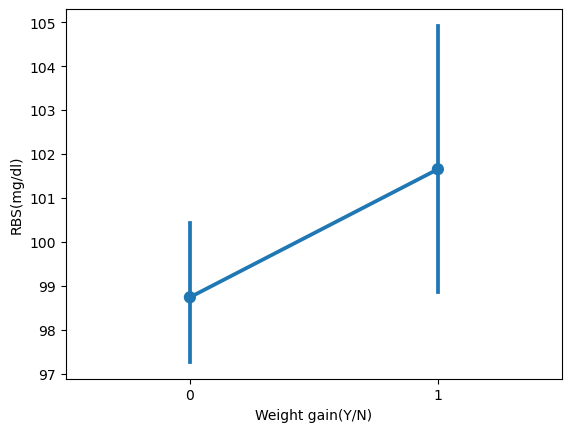

In [38]:
sns.pointplot(x='Weight gain(Y/N)', y='RBS(mg/dl)', data=df)

<Axes: xlabel=' Age (yrs)'>

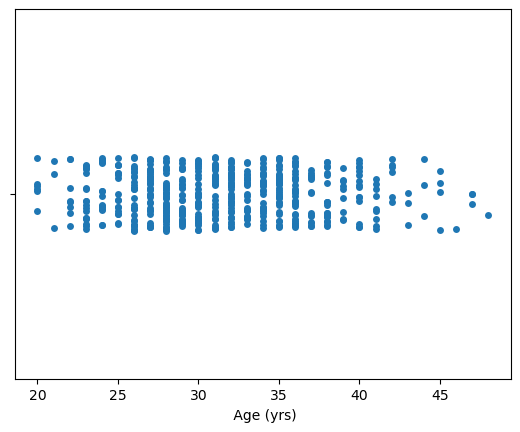

In [39]:
sns.stripplot(x=' Age (yrs)', data=df)

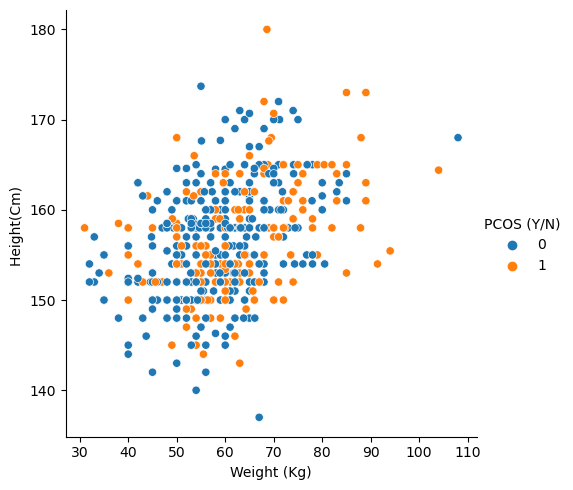

In [40]:
sns.relplot(x='Weight (Kg)', y='Height(Cm) ', hue='PCOS (Y/N)', data=df)

<Axes: xlabel=' Age (yrs)', ylabel='Density'>

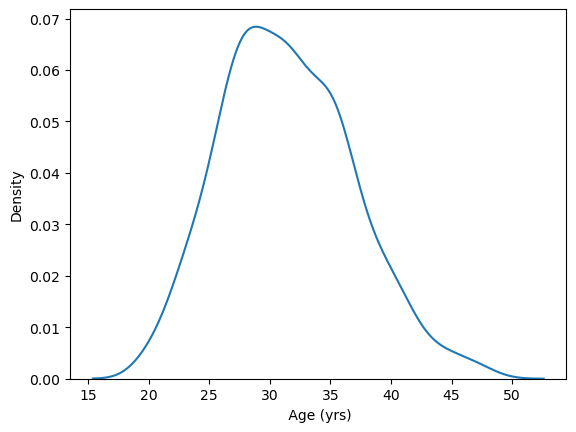

In [41]:
sns.kdeplot(x=' Age (yrs)', data=df)

<Axes: xlabel=' Age (yrs)', ylabel='Density'>

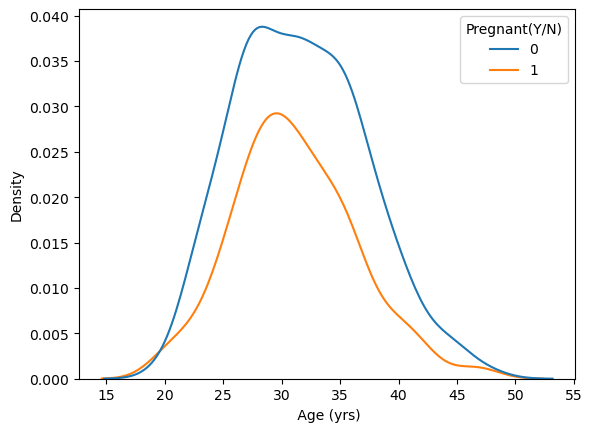

In [42]:
sns.kdeplot(x=' Age (yrs)', hue='Pregnant(Y/N)', data=df)

<Axes: xlabel='Blood Group', ylabel='Proportion'>

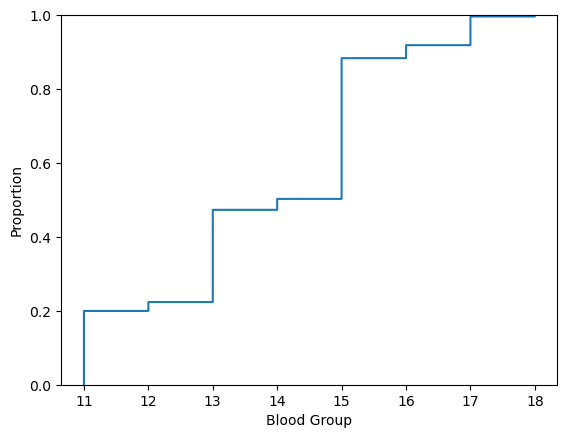

In [43]:
sns.ecdfplot(x='Blood Group', data=df)

<Axes: xlabel='Pimples(Y/N)', ylabel='Fast food (Y/N)'>

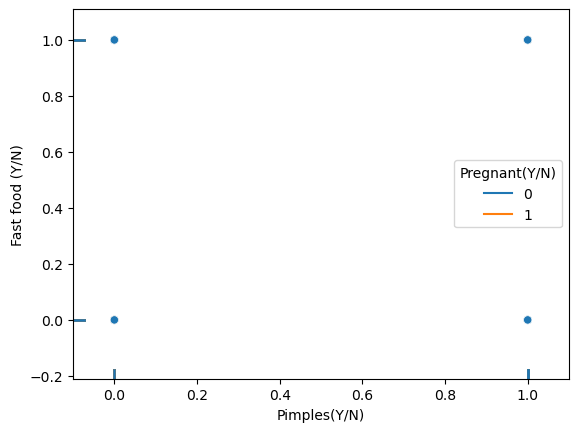

In [44]:
sns.scatterplot(x='Pimples(Y/N)', y='Fast food (Y/N)', hue='Pregnant(Y/N)', data=df)
sns.rugplot(x='Pimples(Y/N)', y='Fast food (Y/N)', hue='Pregnant(Y/N)', data=df)

In [45]:
df.dtypes

SlNo                       int64
Patient File No            int64
PCOS (Y/N)                 int64
 Age (yrs)                 int64
Weight (Kg)              float64
Height(Cm)               float64
BMI                      float64
Blood Group                int64
Pulse rate(bpm)            int64
RR (breaths/min)           int64
Hb(g/dl)                 float64
Cycle(R/I)                 int64
Cycle length(days)         int64
Marraige Status (Yrs)    float64
Pregnant(Y/N)              int64
No of aborptions           int64
I   betaHCG(mIU/mL)      float64
II    betaHCG(mIU/mL)     object
FSH(mIU/mL)              float64
LH(mIU/mL)               float64
FSH/LH                   float64
Hip(inch)                  int64
Waist(inch)                int64
WaistHip Ratio           float64
TSH (mIU/L)              float64
AMH(ng/mL)                object
PRL(ng/mL)               float64
Vit D3 (ng/mL)           float64
PRG(ng/mL)               float64
RBS(mg/dl)               float64
Weight gai

In [46]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [47]:
print(df.columns)

Index(['SlNo', 'Patient File No', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No of aborptions',
       'I   betaHCG(mIU/mL)', 'II    betaHCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'WaistHip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'RegExercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No(L)', 'Follicle No(R)',
       'Avg F size (L) (mm)', 'Avg F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')


In [59]:
df['II    betaHCG(mIU/mL)'] = df['II    betaHCG(mIU/mL)'].astype(str)
df['AMH(ng/mL)'] = df['AMH(ng/mL)'].astype(str)

In [60]:
categorical_cols = ['II    betaHCG(mIU/mL)', 'AMH(ng/mL)']
encoder = OneHotEncoder(drop='first', sparse=False)
encoder_cols = pd.DataFrame(encoder.fit_transform(df[categorical_cols]), columns=encoder.get_feature_names_out(categorical_cols))

In [61]:
encoder_cols

,II betaHCG(mIU/mL)_1.65,II betaHCG(mIU/mL)_1.9,II betaHCG(mIU/mL)_1.92,II betaHCG(mIU/mL)_1.99,II betaHCG(mIU/mL)_1.99.,II betaHCG(mIU/mL)_10,II betaHCG(mIU/mL)_10.24,II betaHCG(mIU/mL)_10.4,II betaHCG(mIU/mL)_10.45,II betaHCG(mIU/mL)_10.84,...,AMH(ng/mL)_8.8,AMH(ng/mL)_8.9,AMH(ng/mL)_8.98,AMH(ng/mL)_9,AMH(ng/mL)_9.1,AMH(ng/mL)_9.2,AMH(ng/mL)_9.7,AMH(ng/mL)_9.8,AMH(ng/mL)_9.9,AMH(ng/mL)_a
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
538,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
539,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
numerical_cols = ['SlNo', 'Patient File No', ' Age (yrs)', 'Weight (Kg)','Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ', 'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)','Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No of aborptions','I   betaHCG(mIU/mL)','FSH(mIU/mL)','LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'WaistHip Ratio','TSH (mIU/L)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)','PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)','Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)','Fast food (Y/N)', 'RegExercise(Y/N)', 'BP _Systolic (mmHg)','BP _Diastolic (mmHg)', 'Follicle No(L)', 'Follicle No(R)','Avg F size (L) (mm)', 'Avg F size (R) (mm)','Endometrium (mm)']
scaler = StandardScaler()
scaled_cols = pd.DataFrame(scaler.fit_transform(df[numerical_cols]), columns=numerical_cols)

In [63]:
scaled_cols.head()

,SlNo,Patient File No,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),...,Pimples(Y/N),Fast food (Y/N),RegExercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No(L),Follicle No(R),Avg F size (L) (mm),Avg F size (R) (mm),Endometrium (mm)
0,-1.728852,-1.728852,-0.634606,-1.364770,-0.744005,-1.236546,0.651284,1.073680,1.633608,-0.785169,...,-0.979870,0.972648,-0.573793,-0.631866,0.551645,-0.740617,-0.821471,0.836776,0.768537,0.011133
1,-1.722449,-1.722449,0.845230,0.486731,0.831983,0.150489,0.651284,0.169968,0.448119,0.623440,...,-0.979870,-1.028122,-0.573793,0.723565,-1.244023,-0.740617,-0.370287,-0.005083,-0.437816,-2.207618
2,-1.716046,-1.716046,0.290291,0.831618,1.412610,0.236785,-1.523682,-0.281888,-0.737370,0.738900,...,1.020544,0.972648,-0.573793,0.723565,0.551645,1.626032,1.885630,0.836776,1.371714,0.704493
3,-1.709643,-1.709643,1.030210,0.486731,-1.407579,1.323495,-0.436199,-0.281888,0.448119,0.969819,...,-0.979870,-1.028122,-0.573793,0.723565,-1.244023,-0.977282,-1.047063,-0.005083,-0.437816,-0.451107
4,-1.703240,-1.703240,-1.189545,-0.693147,0.749036,-1.048778,-1.523682,-0.281888,-0.737370,-1.339375,...,-0.979870,-1.028122,-0.573793,0.723565,0.551645,-0.740617,-0.595879,0.275536,-0.437816,-0.682227


In [64]:
X = pd.concat([encoder_cols, scaled_cols], axis=1)
Y = df['PCOS (Y/N)']

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [66]:
model = LogisticRegression()

In [67]:
model.fit(X_train, Y_train)

LogisticRegression()

In [68]:
print('Train Score : ', model.score(X_train, Y_train))

Train Score :  0.9675925925925926


In [69]:
print('Test Score : ', model.score(X_test, Y_test))

Test Score :  0.8623853211009175


In [70]:
pred_train = model.predict(X_train)

In [71]:
pred_test = model.predict(X_test)

In [72]:
print(metrics.classification_report(Y_train, pred_train))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       287
           1       0.97      0.93      0.95       145

    accuracy                           0.97       432
   macro avg       0.97      0.96      0.96       432
weighted avg       0.97      0.97      0.97       432



In [73]:
print(metrics.classification_report(Y_test, pred_test))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91        77
           1       0.87      0.62      0.73        32

    accuracy                           0.86       109
   macro avg       0.87      0.79      0.82       109
weighted avg       0.86      0.86      0.85       109



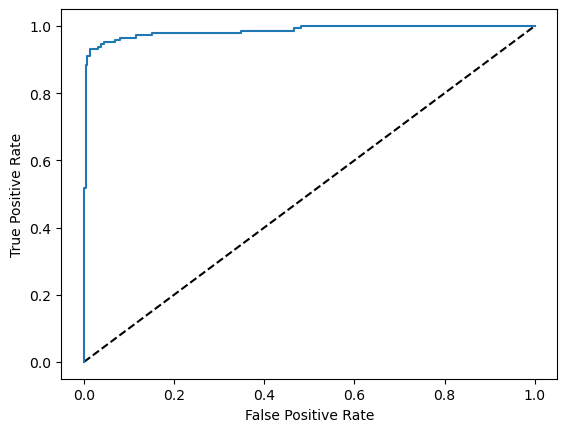

In [74]:
roc = model.predict_proba(X_train)[:,1]

fpr, tpr, threshold = metrics.roc_curve(Y_train, roc)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [75]:
metrics.roc_auc_score(Y_train, roc)

0.9856542112219151

In [76]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(Y_test, pred_test)
print("MCC : ", mcc)

MCC :  0.6540842593054141


In [77]:
param_grid = {
    'penalty' : ['l1', 'l2'],                         #l1 lasso l2 Ridge
    'C' : [0.1, 0.5, 1, 5, 10]
}

In [78]:
from sklearn.model_selection import GridSearchCV

In [79]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

In [80]:
grid.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.5, 1, 5, 10], 'penalty': ['l1', 'l2']})

In [81]:
best_param = grid.best_params_
best_model = grid.best_estimator_

In [82]:
Y_pred = best_model.predict(X_test)

In [91]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

In [84]:
acc = accuracy_score(Y_test, Y_pred)
pre = precision_score(Y_test, Y_pred)
rec = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
roc_auc = roc_auc_score(Y_test, Y_pred)

In [85]:
print('Best Param :  ', best_param)
print('Accuracy : ', acc)               #Accuracy is the proportion of correct predictions over total predictions. 
print('Precision : ', pre)              #Precision measures how good our model is when the prediction is positive. 
print("Recall : ", rec)                 #Recall measures how good our model is at correctly predicting positive classes.
print('Fl Score : ', f1)                # F1 score is a machine learning evaluation metric that measures a model's accuracy. It combines the precision and recall scores of a model. 
print('ROC-AUC Score : ', roc_auc)      #The ROC AUC score tells us how efficient the model is.

Best Param :   {'C': 0.5, 'penalty': 'l2'}
Accuracy :  0.8623853211009175
Precision :  0.8695652173913043
Recall :  0.625
Fl Score :  0.7272727272727273
ROC-AUC Score :  0.7930194805194805


In [89]:
confusion = confusion_matrix(Y_test, Y_pred)
print('Confusion Matrix:')
print(confusion)

Confusion Matrix:
[[74  3]
 [12 20]]


In [92]:
classification_rep = classification_report(Y_test, Y_pred)
print('Classification Report:')
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91        77
           1       0.87      0.62      0.73        32

    accuracy                           0.86       109
   macro avg       0.87      0.79      0.82       109
weighted avg       0.86      0.86      0.85       109



In [93]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

In [94]:
# Defining hyperparameters and their possible values for tuning
param_dist = {
    'penalty': ['l1', 'l2'],
    'C': uniform(loc=0, scale=4)  # Random values between 0 and 4 for regularization strength (C)
}

In [95]:
# Creating a RandomizedSearchCV object
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=100, cv=5, random_state=42, n_jobs=-1)

In [96]:
# Fitting the RandomizedSearchCV object to the training data
random_search.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000298017B7350>,
                                        'penalty': ['l1', 'l2']},
                   random_state=42)

In [102]:
# Getting the best hyperparameters
best_params = random_search.best_params_

In [98]:
# Getting the best model
best_model = random_search.best_estimator_

In [107]:
# Making predictions on the test set
Y_pred = best_model.predict(X_test)

In [108]:
# Evaluating the best model
acc = accuracy_score(Y_test, Y_pred)
pre = precision_score(Y_test, Y_pred)
rec = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
roc_auc = roc_auc_score(Y_test, Y_pred)

In [101]:
print('Best Param :  ', best_param)
print('Accuracy : ', acc)
print('Precision : ', pre)
print("Recall : ", rec)
print('Fl Score : ', f1)
print('ROC-AUC Score : ', roc_auc)

Best Param :   {'C': 0.5, 'penalty': 'l2'}
Accuracy :  0.8623853211009175
Precision :  0.8695652173913043
Recall :  0.625
Fl Score :  0.7272727272727273
ROC-AUC Score :  0.7930194805194805


In [103]:
confusion = confusion_matrix(Y_test, Y_pred)
print('Confusion Matrix:')
print(confusion)

Confusion Matrix:
[[74  3]
 [12 20]]


In [104]:
classification_rep = classification_report(Y_test, Y_pred)
print('Classification Report:')
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91        77
           1       0.87      0.62      0.73        32

    accuracy                           0.86       109
   macro avg       0.87      0.79      0.82       109
weighted avg       0.86      0.86      0.85       109

